# Introduction to PyTorch


In [144]:
import torch
print(torch.version.cuda)
print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

12.6
True
cuda


## What is PyTorch?

<style>
    /* Adjusting font size for slides */
    .reveal .slides section {
        font-size: 4px !important;  /* Adjust the font size of text in slides */
    }
</style>

PyTorch is a Python-based scientific computing package that serves two primary purposes:


1. **A replacement for NumPy**:  
   It enables the utilization of **GPUs** and other accelerators for high-performance computing.

2. **An automatic differentiation library**:  
   It is particularly useful for implementing **neural networks** and deep learning models.


### Tensors in PyTorch

In PyTorch, a **tensor** is a multi-dimensional array or matrix that contains elements of a single data type.

## Creating Tensors

You can create tensors in PyTorch using several functions:

From a Python list

In [148]:
torch.tensor([1, 2, 3, 4], device=device).device


device(type='cuda', index=0)

Tensor filled with zeros

In [102]:
torch.zeros(2, 3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

Tensor filled with ones

In [103]:
torch.ones(3, 2)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

Tensor filled with random values

In [104]:
torch.rand(2,2)

tensor([[0.9811, 0.7353],
        [0.1020, 0.1197]])

Tensor from NumPy arrays

In [149]:
import numpy as np

np_arr = np.array([1, 2, 3, 4])
torch_tensor = torch.tensor(np_arr, device=device)
torch_tensor

tensor([1, 2, 3, 4], device='cuda:0')

## Tensor Properties

Dimensions: `shape` / `size` (`shape` in numpy)

In [106]:
torch_tensor.size()

torch.Size([4])

Element datatype: `dtype`

In [107]:
torch_tensor.dtype

torch.int64

Device: `device`
- one of `cpu`, `cuda:{#N}`, `mps` (Apple Metal), etc.

In [150]:
torch_tensor.device

device(type='cuda', index=0)

## Basic Tensor Operations

### Element-wise Operations

These operations apply the operation to each element of the tensor.

In [109]:
# Create two tensors
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

In [110]:
# Element-wise addition
sum_tensor = a + b  # [5, 7, 9]

In [111]:
# Element-wise subtraction
sub_tensor = a - b  # [-3, -3, -3]

In [112]:
# Element-wise multiplication
mul_tensor = a * b  # [4, 10, 18]

In [113]:
# Element-wise division
div_tensor = a / b  # [0.25, 0.4, 0.5]

Matrix Operations

In [114]:
# Matrix multiplication
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])

result = torch.matmul(a, b)  # [[19, 22], [43, 50]]
result = a @ b  # Same as torch.matmul

Transpose, Reshape and Permute

In [115]:
# Transpose a tensor (swap rows and columns)
a = torch.tensor([[1, 2], [3, 4]])
transposed = a.T  # [[1, 3], [2, 4]]

In [116]:
# Reshaping a tensor
b = torch.tensor([1, 2, 3, 4, 5, 6])
reshaped_b = b.view(2, 3)  # [[1, 2, 3], [4, 5, 6]]

The `permute()` function allows you to change the order of the dimensions of a tensor.

In [117]:
c = torch.rand(3,4,5)
c = c.permute(2,0,1)
print(c.shape)

torch.Size([5, 3, 4])


## GPU Acceleration

In [118]:
# Create data : Change mps to cuda if you have GPU otherwise do not run this
pt_data1     = torch.rand(12, 4096, 768)
pt_data1_acc = pt_data1.to('cuda')
np_data1     = pt_data1.numpy()

pt_data2     = torch.rand(12, 768, 4096)
pt_data2_acc = pt_data2.to('cuda')
np_data2     = pt_data2.numpy()

In [119]:
torch.cuda.empty_cache()
torch.cuda.synchronize()

In [120]:
%%timeit -r 4
np_data2 @ np_data1

144 ms ± 5.78 ms per loop (mean ± std. dev. of 4 runs, 10 loops each)


In [121]:
%%timeit -r 4
pt_data2 @ pt_data1

197 ms ± 13.4 ms per loop (mean ± std. dev. of 4 runs, 1 loop each)


In [122]:
%%timeit -r 4
pt_data2_acc @ pt_data1_acc

9.81 ms ± 665 μs per loop (mean ± std. dev. of 4 runs, 1,000 loops each)


## Torch Autograd

**torch.autograd** is PyTorch’s automatic differentiation engine, essential for training neural networks via backpropagation. It dynamically computes gradients of tensors with respect to a scalar (e.g., a loss function).

- **Automatic Differentiation**: Computes gradients efficiently, enabling parameter updates during training.  

- **Dynamic Computational Graphs**: Builds graphs on-the-fly, offering flexibility for variable-length sequences and dynamic structures.

- **Tensors with Gradients**: Setting `requires_grad=True` tracks operations and enables gradient computation.

Consider the following expression for the demo:

$z=(x+y)$

$f=z^2+t^4$

$\frac{\partial f}{\partial x}=2(x+y)$  

$\frac{\partial f}{\partial y}=2(x+y)$

$\frac{\partial f}{\partial t}=4t^3$

In [162]:
# Create two tensors with requires_grad=True to track operations for gradient computation
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)
t = torch.tensor(3.0, requires_grad=True)

In [163]:
# Define a simple computation using these tensors
z = x + y
f = z ** 2 + t ** 4

In [ ]:
# Let's compute gradients with respect to x and y
f.backward()

tensor(10.)


In [126]:
# Gradients are computed and stored in the .grad attribute of the tensors
gradient_x = x.grad
gradient_y = y.grad
gradient_t = t.grad

print("Result:", f)
print("Gradient with respect to x:", gradient_x)
print("Gradient with respect to y:", gradient_y)
print("Gradient with respect to t:", gradient_t)

Result: tensor(106., grad_fn=<AddBackward0>)
Gradient with respect to x: tensor(10.)
Gradient with respect to y: tensor(10.)
Gradient with respect to t: tensor(108.)


## Minimization through PyTorch

We are finding min value for the given function $y=f(x)$.

$y=f(x) = x^2 -3x + 2$

In [127]:
# Define the function y = x^2 - 3x + 2
def function(x):
    return x**2 - 3 * x + 2

# Initial guess for the minimum
x = torch.tensor(0.0, requires_grad=True)

# Learning rate and number of iterations for gradient descent
learning_rate = 0.01
num_iterations = 500

# Lists to store x and y values
x_cal = []
y_cal = []

In [128]:
# Gradient descent loop
for i in range(num_iterations):
    # Calculate the value of the function at the current point
    y = function(x)

    # Compute the gradient of the function with respect to x
    y.backward()  # Compute gradients
    gradient = x.grad  # Get gradient of x

    # Update x using gradient descent
    with torch.no_grad():
        x -= learning_rate * gradient  # In-place update

    # Clear gradients for next iteration
    x.grad.zero_()

    # Store values for tracking progress
    x_cal.append(x.item())
    y_cal.append(function(x).item())

In [129]:
# The optimized value of x should be the minimum value of the function
minimum_value = function(x).item()

print("Minimum Value:", minimum_value)
print("Optimized x:", x.item())

Minimum Value: -0.25
Optimized x: 1.4999384880065918


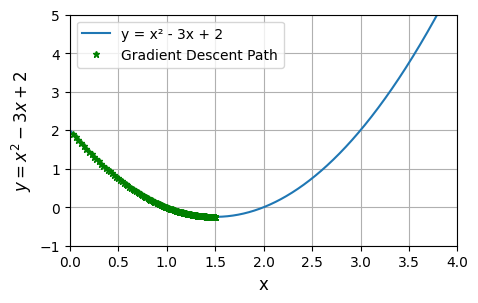

In [130]:
import matplotlib.pyplot as plt

# Creating vectors X and Y
x_vals = np.linspace(-1, 4, 1000)
y_vals = x_vals ** 2 - 3 * x_vals + 2

# Create the plot
fig = plt.figure(figsize=(5, 3))
plt.plot(x_vals, y_vals, label='y = x² - 3x + 2')  # Function curve
plt.plot(x_cal, y_cal, '*g', markersize=5, label='Gradient Descent Path')  # GD path

# Axis labels and limits
plt.axis([0, 4, -1, 5])
plt.xlabel('x', fontsize=12)
plt.ylabel('$y = x^2 - 3x + 2$', fontsize=12)
plt.legend()
plt.grid()

# Show the plot
plt.show()

## Torch Optim

- `torch.optim` is PyTorch’s module for optimization algorithms, used to update model parameters efficiently.


- It provides built-in optimizers like **SGD, Adam, and RMSprop** for different optimization strategies.


- The typical workflow involves:
  1. **Initialize the optimizer**: `optimizer = torch.optim.SGD(model.parameters(), lr=0.01)`
  2. **Compute gradients**: `loss.backward()`
  3. **Update parameters**: `optimizer.step()`
  4. **Clear previous gradients**: `optimizer.zero_grad()`


- This automates gradient-based updates, simplifying optimization in deep learning models.

In [131]:
# Lists to store values for plotting
x_cal = []
y_cal = []

# Initial guess for the minimum
x = torch.tensor(0.0, requires_grad=True)

In [132]:
# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD([x], lr=learning_rate)

In [133]:
# Gradient descent loop using optimizer
for i in range(num_iterations):
    optimizer.zero_grad()  # Clear previous gradients

    y = function(x)  # Compute function value
    y.backward()  # Compute gradient

    optimizer.step()  # Update x

    # Store values for visualization
    x_cal.append(x.item())
    y_cal.append(y.item())

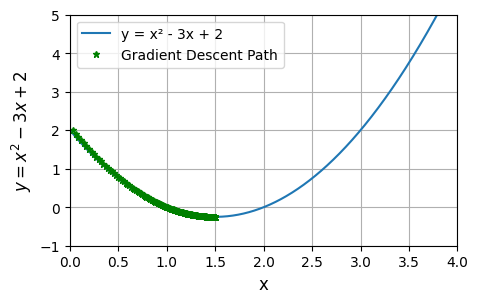

In [134]:
# Plot function and gradient descent path
x_vals = np.linspace(-1, 4, 1000)
y_vals = function(torch.tensor(x_vals)).numpy()

fig = plt.figure(figsize=(5, 3))
plt.plot(x_vals, y_vals, label='y = x² - 3x + 2')
plt.plot(x_cal, y_cal, '*g', markersize=5, label='Gradient Descent Path')

# Labels and settings
plt.axis([0, 4, -1, 5])
plt.xlabel('x', fontsize=12)
plt.ylabel('$y = x^2 - 3x + 2$', fontsize=12)
plt.legend()
plt.grid()

plt.show()

## Train a Simple Neural Network

### Steps to Train an MLP on MNIST  

1. **Load and Prepare Data**  
   - Use `torchvision.datasets.MNIST` to download the dataset.  
   - Apply transformations (convert to tensor, normalize).  
   - Create `DataLoader` for batching and shuffling.   

2. **Define the MLP Model**  
   - Use `nn.Sequential` to stack layers.  
   - Flatten input images (28×28 → 784).  
   - Use `Linear` layers with `ReLU` activation.  
   - Output layer should have 10 neurons (one per digit).

3. **Set Up Loss Function and Optimizer**  
   - Use `CrossEntropyLoss` (suitable for classification).  
   - Choose an optimizer (e.g., `SGD` with learning rate 0.01).   

4. **Write the Training Loop**  
   - Iterate through training data in batches.  
   - Compute predictions and loss.  
   - Perform backpropagation (`loss.backward()`).  
   - Update model weights using `optimizer.step()`.  

5. **Evaluate on Test Data**  
   - Disable gradient tracking with `torch.no_grad()`.  
   - Make predictions and compute accuracy.  
   - Print the final test accuracy.

### Create DataSet

In [135]:
import torchvision
import torchvision.transforms as transforms

In [136]:
# Load BloodMNIST dataset
from medmnist import BloodMNIST

basic_transforms = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])

train_dataset = BloodMNIST(split="train", transform=basic_transforms, download=True, size=28)
test_dataset = BloodMNIST(split="test", transform=basic_transforms, download=True, size=28)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [137]:
# information about the train_dataset
train_dataset

Dataset BloodMNIST of size 28 (bloodmnist)
    Number of datapoints: 11959
    Root location: C:\Users\pande\.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.
    Lice

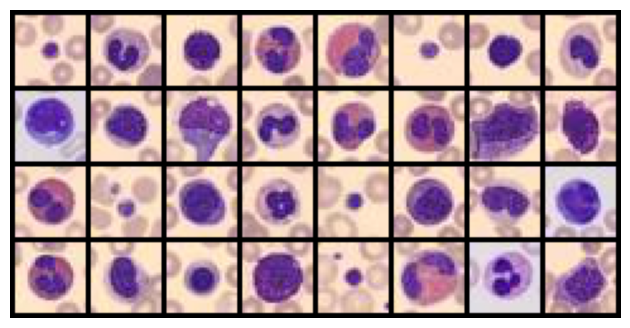

In [138]:
# visualise data
import torchvision.utils as vutils

# Get a batch of training images
images, labels = next(iter(train_loader))

# Create a grid of images
img_grid = vutils.make_grid(images[:32], nrow=8, normalize=True)

# Display the grid
plt.figure(figsize=(8, 4))
plt.imshow(img_grid.permute(1, 2, 0))  # Convert from (C, H, W) to (H, W, C)
plt.axis("off")
plt.show()


## Create a Multi-Layer Perceptron

In [139]:
import torch.nn as nn

# Define a simple MLP
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(3* 28 * 28, 256), nn.ReLU(),
            nn.Linear(256, 128), nn.ReLU(),
            nn.Linear(128, 8))

    def forward(self, x):
        return self.layers(x)

In [140]:
model = MLP()
print(model)

MLP(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2352, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Linear(in_features=128, out_features=8, bias=True)
  )
)


## Optimizer & loss function

In [141]:
import torch.optim as optim

# Initialize model, loss, and optimizer: use CUDA instead of mps
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

## Training Loop

In [142]:
from tqdm import tqdm

# Training loop with tqdm progress bar
for epoch in range(5):
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}", leave=True)

    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        loss = criterion(model(images), labels.view(-1))
        loss.backward()
        optimizer.step()

        # Update tqdm description with loss
        loop.set_postfix(loss=loss.item())

print("Training complete!")

Epoch 5: 100%|██████████| 187/187 [00:02<00:00, 67.79it/s, loss=0.694]

Training complete!


## Test Accuracy

In [143]:
from sklearn.metrics import classification_report

# list for predictions and actual labels
labels_list = []
preds_list = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        preds = model(images).argmax(dim=1)
        labels_list.extend(labels.cpu().numpy())
        preds_list.extend(preds.cpu().numpy())

report = classification_report(y_true=labels_list,
                               y_pred=preds_list)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.13      0.22       244
           1       0.76      0.79      0.78       624
           2       0.82      0.63      0.71       311
           3       0.43      0.79      0.56       579
           4       0.71      0.72      0.71       243
           5       0.45      0.02      0.03       284
           6       0.79      0.82      0.80       666
           7       0.95      0.98      0.97       470

    accuracy                           0.69      3421
   macro avg       0.70      0.61      0.60      3421
weighted avg       0.71      0.69      0.66      3421



In [179]:
# Define data transformations
# basic_transforms = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5), (0.5))
# ])

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def get_data_loaders(batch_size=64):
    """Downloads and prepares the BloodMNIST dataloaders."""
    train_dataset = BloodMNIST(split="train", transform=basic_transforms, download=True, size=28)
    test_dataset = BloodMNIST(split="test", transform=basic_transforms, download=True, size=28)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, test_loader

def train_and_evaluate(model, train_loader, test_loader, optimizer, criterion, epochs):
    """A complete function to train and evaluate a given model."""
    model.to(device)
    
    # Training loop
    for epoch in range(epochs):
        model.train() # Set model to training mode
        loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", leave=True)
        for images, labels in loop:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels.view(-1))
            loss.backward()
            optimizer.step()
            
            loop.set_postfix(loss=loss.item())

    # Evaluation
    model.eval() # Set model to evaluation mode
    labels_list = []
    preds_list = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            preds = model(images).argmax(dim=1)
            labels_list.extend(labels.cpu().numpy())
            preds_list.extend(preds.cpu().numpy())
            
    print("\n--- Classification Report ---")
    print(classification_report(y_true=labels_list, y_pred=preds_list))
    print("-" * 55 + "\n")

In [180]:
def run_baseline_model():
    """Replicates the original notebook's model and training."""
    print("Running Experiment: Baseline Model...")
    
    class MLP(nn.Module):
        def __init__(self):
            super().__init__()
            self.layers = nn.Sequential(
                nn.Flatten(),
                nn.Linear(3 * 28 * 28, 256), nn.ReLU(),
                nn.Linear(256, 128), nn.ReLU(),
                nn.Linear(128, 8)
            )
        def forward(self, x):
            return self.layers(x)

    train_loader, test_loader = get_data_loaders()
    model = MLP()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    
    train_and_evaluate(model, train_loader, test_loader, optimizer, criterion, epochs=5)
run_baseline_model()

Running Experiment: Baseline Model...


Epoch 5/5: 100%|██████████| 187/187 [00:02<00:00, 68.61it/s, loss=0.798]



--- Classification Report ---
              precision    recall  f1-score   support

           0       0.72      0.24      0.36       244
           1       0.85      0.78      0.82       624
           2       0.68      0.73      0.70       311
           3       0.45      0.80      0.57       579
           4       0.76      0.69      0.72       243
           5       0.54      0.08      0.14       284
           6       0.81      0.82      0.81       666
           7       0.97      0.96      0.97       470

    accuracy                           0.71      3421
   macro avg       0.72      0.64      0.64      3421
weighted avg       0.73      0.71      0.69      3421

-------------------------------------------------------



In [168]:
def run_deeper_model():
    """Trains a deeper MLP by adding more hidden layers."""
    print("Running Experiment 1: Deeper Model (Increased Hidden Layers)...")

    class DeeperMLP(nn.Module):
        def __init__(self):
            super().__init__()
            self.layers = nn.Sequential(
                nn.Flatten(),
                nn.Linear(3 * 28 * 28, 256), nn.ReLU(),
                nn.Linear(256, 128), nn.ReLU(),
                nn.Linear(128, 64), nn.ReLU(),  # Additional layer
                nn.Linear(64, 32), nn.ReLU(),   # Additional layer
                nn.Linear(32, 8)
            )
        def forward(self, x):
            return self.layers(x)

    train_loader, test_loader = get_data_loaders()
    model = DeeperMLP()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    train_and_evaluate(model, train_loader, test_loader, optimizer, criterion, epochs=5)

run_deeper_model()

Running Experiment 1: Deeper Model (Increased Hidden Layers)...


Epoch 5/5: 100%|██████████| 187/187 [00:02<00:00, 66.08it/s, loss=1.16]



--- Classification Report ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       244
           1       0.44      0.76      0.56       624
           2       0.60      0.53      0.57       311
           3       0.43      0.33      0.38       579
           4       0.00      0.00      0.00       243
           5       0.00      0.00      0.00       284
           6       0.53      0.88      0.66       666
           7       0.88      0.99      0.93       470

    accuracy                           0.55      3421
   macro avg       0.36      0.44      0.39      3421
weighted avg       0.43      0.55      0.47      3421

-------------------------------------------------------



x:\Edu\7th Sem\Neural Networks\(Lab) Neural Networks\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
x:\Edu\7th Sem\Neural Networks\(Lab) Neural Networks\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
x:\Edu\7th Sem\Neural Networks\(Lab) Neural Networks\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

In [169]:
def run_tanh_activation_model():
    """Trains an MLP using Tanh as the activation function instead of ReLU."""
    print("Running Experiment 2: Changed Activation Function (Tanh)...")

    class MLPWithTanh(nn.Module):
        def __init__(self):
            super().__init__()
            self.layers = nn.Sequential(
                nn.Flatten(),
                nn.Linear(3 * 28 * 28, 256), nn.Tanh(), # Changed to Tanh
                nn.Linear(256, 128), nn.Tanh(),      # Changed to Tanh
                nn.Linear(128, 8)
            )
        def forward(self, x):
            return self.layers(x)

    train_loader, test_loader = get_data_loaders()
    model = MLPWithTanh()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    train_and_evaluate(model, train_loader, test_loader, optimizer, criterion, epochs=5)
run_tanh_activation_model()

Running Experiment 2: Changed Activation Function (Tanh)...


Epoch 5/5: 100%|██████████| 187/187 [00:02<00:00, 69.39it/s, loss=0.625]



--- Classification Report ---
              precision    recall  f1-score   support

           0       0.65      0.28      0.39       244
           1       0.76      0.84      0.80       624
           2       0.82      0.64      0.72       311
           3       0.47      0.68      0.56       579
           4       0.74      0.67      0.70       243
           5       0.53      0.15      0.23       284
           6       0.76      0.87      0.81       666
           7       0.94      0.99      0.96       470

    accuracy                           0.71      3421
   macro avg       0.71      0.64      0.65      3421
weighted avg       0.71      0.71      0.69      3421

-------------------------------------------------------



In [170]:
def run_more_epochs():
    """Trains the original baseline model for more epochs."""
    print("Running Experiment 3: Increased Epochs (15 Epochs)...")
    
    # Re-using the baseline MLP class
    class MLP(nn.Module):
        def __init__(self):
            super().__init__()
            self.layers = nn.Sequential(
                nn.Flatten(),
                nn.Linear(3 * 28 * 28, 256), nn.ReLU(),
                nn.Linear(256, 128), nn.ReLU(),
                nn.Linear(128, 8)
            )
        def forward(self, x):
            return self.layers(x)

    train_loader, test_loader = get_data_loaders()
    model = MLP()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    train_and_evaluate(model, train_loader, test_loader, optimizer, criterion, epochs=15)
run_more_epochs()

Running Experiment 3: Increased Epochs (15 Epochs)...


Epoch 15/15: 100%|██████████| 187/187 [00:02<00:00, 67.11it/s, loss=0.543]



--- Classification Report ---
              precision    recall  f1-score   support

           0       0.61      0.64      0.63       244
           1       0.90      0.94      0.92       624
           2       0.85      0.75      0.80       311
           3       0.60      0.60      0.60       579
           4       0.81      0.70      0.75       243
           5       0.73      0.43      0.54       284
           6       0.77      0.94      0.85       666
           7       0.97      0.99      0.98       470

    accuracy                           0.79      3421
   macro avg       0.78      0.75      0.76      3421
weighted avg       0.79      0.79      0.78      3421

-------------------------------------------------------



In [171]:
def run_adam_optimizer():
    """Trains the baseline model with the Adam optimizer."""
    print("Running Experiment 4: Using a Different Optimizer (Adam)...")

    # Re-using the baseline MLP class
    class MLP(nn.Module):
        def __init__(self):
            super().__init__()
            self.layers = nn.Sequential(
                nn.Flatten(),
                nn.Linear(3 * 28 * 28, 256), nn.ReLU(),
                nn.Linear(256, 128), nn.ReLU(),
                nn.Linear(128, 8)
            )
        def forward(self, x):
            return self.layers(x)

    train_loader, test_loader = get_data_loaders()
    model = MLP()
    criterion = nn.CrossEntropyLoss()
    # Using Adam with a smaller learning rate
    optimizer = optim.Adam(model.parameters(), lr=0.001) 

    train_and_evaluate(model, train_loader, test_loader, optimizer, criterion, epochs=5)
run_adam_optimizer()

Running Experiment 4: Using a Different Optimizer (Adam)...


Epoch 5/5: 100%|██████████| 187/187 [00:02<00:00, 63.98it/s, loss=0.408]



--- Classification Report ---
              precision    recall  f1-score   support

           0       0.80      0.48      0.60       244
           1       0.98      0.85      0.91       624
           2       0.94      0.68      0.79       311
           3       0.74      0.56      0.63       579
           4       0.69      0.84      0.76       243
           5       0.57      0.86      0.68       284
           6       0.73      0.97      0.83       666
           7       0.99      0.99      0.99       470

    accuracy                           0.80      3421
   macro avg       0.81      0.78      0.78      3421
weighted avg       0.82      0.80      0.80      3421

-------------------------------------------------------



In [172]:
def run_regularized_model():
    """Trains an MLP with Batch Normalization and Dropout."""
    print("Running Experiment 5: Using Normalization and Dropout...")

    class MLPWithRegularization(nn.Module):
        def __init__(self):
            super().__init__()
            self.layers = nn.Sequential(
                nn.Flatten(),
                nn.Linear(3 * 28 * 28, 256),
                nn.BatchNorm1d(256), # Batch Norm added
                nn.ReLU(),
                nn.Dropout(0.5),      # Dropout added (50% probability)
                nn.Linear(256, 128),
                nn.BatchNorm1d(128), # Batch Norm added
                nn.ReLU(),
                nn.Dropout(0.5),      # Dropout added (50% probability)
                nn.Linear(128, 8)
            )
        def forward(self, x):
            return self.layers(x)

    train_loader, test_loader = get_data_loaders()
    model = MLPWithRegularization()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    train_and_evaluate(model, train_loader, test_loader, optimizer, criterion, epochs=5)
run_regularized_model()

Running Experiment 5: Using Normalization and Dropout...


Epoch 5/5: 100%|██████████| 187/187 [00:02<00:00, 65.27it/s, loss=0.731]



--- Classification Report ---
              precision    recall  f1-score   support

           0       0.69      0.56      0.62       244
           1       0.93      0.95      0.94       624
           2       0.93      0.67      0.78       311
           3       0.58      0.73      0.65       579
           4       0.72      0.82      0.77       243
           5       0.69      0.42      0.53       284
           6       0.88      0.91      0.90       666
           7       0.97      1.00      0.98       470

    accuracy                           0.81      3421
   macro avg       0.80      0.76      0.77      3421
weighted avg       0.81      0.81      0.80      3421

-------------------------------------------------------

